## Lab 4 - Analyzing Real Estate Data in St. Petersburg
We have data from Yandex.Realty classified https://realty.yandex.ru containing real estate listings for apartments in St. Petersburg and Leningrad Oblast from 2016 till the middle of August 2018. In this Lab you'll learn how to work with datasets in python using pandas library for data analysis using the provided data. 
For datasets like this it becomes hard to use Excel because of its size. If you learn how to work with pandas you'll be able to do basic analytical research much faster than in Excel.
To execute code IPython notebook click on the Cell and press Shift-Enter.
If you don't have any experience with Jupyter notebooks, please look at this tutorial: https://mybinder.org/v2/gh/ipython/ipython-in-depth/master?filepath=binder/Index.ipynb

### Main objectives
After successful completion of the lab work students will be able to:
-	Analyze large datasets that don't work well in Excel using IPython notebook and pandas library
-   Find outliers and remove them in the datasets
-	Calculate different statistics on data fields


### Tasks
-	Calculate median and mean sell and rent prices in St. Petersburg
-   Find outliers: too cheap or too expensive apartments which seem to be a wrong data. Remove them from the dataset.
-	Find houses with the most cheapest and most expensive prices per square meter.
-   Analyze how many rent offers have the commission and what is the most popular commission



In [1]:
# let's import pandas library and set options to be able to view data right in the browser
# Assign pd for a short alias for pandas library
import pandas as pd
# Call set_option function fron pandas library to edit them limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
# let's look what is inside our data file to understand how we can export it. 
# We can use linux command "head" which shows the first row in the file. 
# In IPython notebooks you can execute linux commands using "!" prefixe before the command name. 
# This mechanism is called "IPython magic"
!head -n 3 ../Celine/spb.real.estate.archive.2018.tsv

offer_id	first_day_exposition	last_day_exposition	last_price	floor	open_plan	rooms	studio	area	kitchen_area	living_area	agent_fee	renovation	offer_type	category_type	unified_address	building_id
5490504238877583424	2014-11-27T00:00:00+03:00	2016-03-14T00:00:00+03:00	3676740.0	19	False	1	False	27.4	16.56	16.56		0.0	1	2	Россия, Санкт-Петербург, улица Шкапина, 9-11	3552413344225333068
5490504238903444021	2014-11-27T00:00:00+03:00	2016-04-28T00:00:00+03:00	7038880.0	2	False	3	False	85.84	19.64	41.2		0.0	1	2	Россия, Санкт-Петербург, Кушелевская дорога, 3к4	7274736308217971906


In [3]:
# if you don't remember what linux command does (i.e. what is -n), you can always look for help
!head --help

Usage: head [OPTION]... [FILE]...
Print the first 10 lines of each FILE to standard output.
With more than one FILE, precede each with a header giving the file name.

With no FILE, or when FILE is -, read standard input.

Mandatory arguments to long options are mandatory for short options too.
  -c, --bytes=[-]NUM       print the first NUM bytes of each file;
                             with the leading '-', print all but the last
                             NUM bytes of each file
  -n, --lines=[-]NUM       print the first NUM lines instead of the first 10;
                             with the leading '-', print all but the last
                             NUM lines of each file
  -q, --quiet, --silent    never print headers giving file names
  -v, --verbose            always print headers giving file names
  -z, --zero-terminated    line delimiter is NUL, not newline
      --help     display this help and exit
      --version  output version information and exit

NUM may have a mu

In [4]:
# we see that it's tab separated file, we can load it with pd.read_table method
# load our dataset and see which data it contains.
# HINT: you can type 'Tab' after starting typing the filename and IPython will automatically fill it for you
# After this command a new variable will be created (spb_df) containing pandas dataframe with data in our file
# You can think of dataframe structure as an analogue of Excel sheet
spb_df = pd.read_table('../Celine/spb.real.estate.archive.2018.tsv')

In [5]:
# HINT: if you don't know which arguments any function takes or what it does you can check the documenation right 
# in the notebook just by adding "?" after the function name. Let's look at pandas read_table function:
pd.read_table?

In [6]:
# let's check how much data in terms of rows we have where each row represent 
# one offer from Yandex.Realty
len(spb_df)

429187

In [7]:
# let's look at random sample of size 10 of the loaded dataset to understand what's inside
spb_df.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
126038,8449861274772357835,2017-01-23T00:00:00+03:00,2017-02-02T00:00:00+03:00,35000.0,2,False,0,True,40.0,NaN,30.00,100.0,0.0,2,2,"Россия, Санкт-Петербург, 3-я линия Васильевского острова, 36",2117331053553400155
327000,4981854237537882880,2018-04-07T00:00:00+03:00,2018-04-14T00:00:00+03:00,20000.0,9,False,1,False,40.0,11.00,19.00,50.0,NaN,2,2,"Россия, Санкт-Петербург, Новоколомяжский проспект, 8/10",1813988382198783667
25989,3464020066934236968,2015-12-08T00:00:00+03:00,2017-01-12T00:00:00+03:00,4854880.0,5,False,1,False,30.4,NaN,19.90,NaN,5.0,1,2,"Россия, Санкт-Петербург, Красногвардейский район, Республиканская улица, 24к1",7871770917864483519
313773,5262195632201414401,2018-02-15T00:00:00+03:00,2018-05-19T00:00:00+03:00,4200000.0,12,False,2,False,55.0,10.00,31.00,NaN,NaN,1,2,"Россия, Санкт-Петербург, Ириновский проспект, 33",5038812266738444917
148993,244178307541186017,2017-03-14T00:00:00+03:00,2017-04-05T00:00:00+03:00,6069700.0,1,False,2,False,58.0,9.70,34.80,NaN,0.0,1,2,"Россия, Санкт-Петербург, Богатырский проспект, 49к1",5381016492147265851
201568,8353202309096016682,2017-07-31T00:00:00+03:00,2018-08-02T00:00:00+03:00,4900000.0,8,False,3,False,80.1,10.80,49.10,NaN,NaN,1,2,"Россия, Санкт-Петербург, Пискарёвский проспект, 159к7",2178893236353402679
168459,7518813747443071386,2017-05-18T00:00:00+03:00,2018-06-15T00:00:00+03:00,2200000.0,5,False,1,False,31.5,8.50,16.50,NaN,NaN,1,2,"Россия, Ленинградская область, Тосненское городское поселение, Тосно, шоссе Барыбина, 10А",7477569579417481129
390299,508864267071728128,2017-08-11T00:00:00+03:00,2018-07-10T00:00:00+03:00,20000.0,13,False,0,True,25.0,NaN,18.50,50.0,10.0,2,2,"Россия, Санкт-Петербург, улица Адмирала Трибуца, 7",2844409614380755006
18251,2332956270715914185,2015-10-22T00:00:00+03:00,2017-01-24T00:00:00+03:00,8421532.0,7,False,2,False,76.1,16.42,33.99,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Смоленки, 3к1",2678053774031074089
157367,7280007410593083137,2017-04-10T00:00:00+03:00,2017-06-02T00:00:00+03:00,27000.0,4,False,1,False,39.0,15.00,15.00,NaN,11.0,2,2,"Россия, Санкт-Петербург, Заставская улица, 44",1036064960636747522


In [8]:
len(spb_df[(spb_df["offer_type"] == 1)])

258001

In [9]:
spb_df.sample(5000).to_csv('spb.real.estate.archive.sample5000.tsv', index = False, sep='\t')

In [10]:
!pwd

/home/jovyan/Celine


### Analyze prices for rent and sell
We see that we have both RENT and SELL data. 
<p>offer_type column contains data to distinct them, 2 stands for RENT, 1 for SELL


#### Analyze rent prices

In [11]:
# at first let's split our dataframe to rent and sell
# Select some part of dataframe according to conditions in brackets
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]
# .format function allows you to put variales' values instead of {} in the final string
print("Total rent data size: {}".format(len(rent_df)))
print("Total sell data size: {}".format(len(sell_df)))

Total rent data size: 171186
Total sell data size: 258001


In [12]:
# let's check median and price for renting apartments
# .last_price indicates that you use data just from the column named last_price
rent_median_price = rent_df.last_price.median()
rent_mean_price = rent_df.last_price.mean()
print("Rent median price: {}".format(rent_median_price))
print("Rent mean price: {}".format(rent_mean_price))

Rent median price: 25000.0
Rent mean price: 31719.256638977487


In [13]:
# Just to look at data of one column you can select this column. 
# 'head' function will take only first rows 
rent_df.last_price.head(10)

1086    20000.0
1096    40000.0
1097    45000.0
1149    21000.0
1514    25000.0
1515    35000.0
1516    22000.0
1537    20000.0
1555    26000.0
1695    25000.0
Name: last_price, dtype: float64

#### Let's look at the most expensive apartments in rent

In [14]:
# .max function returns the maximum value across all rows
max_price_rent = rent_df.last_price.max()

In [15]:
max_price_rent = rent_df.last_price.max()
print("Max price in rent: {}".format(max_price_rent))

Max price in rent: 4900000.0


In [16]:
# Now select all offers where price is equal to maximum value across all rent prices
rent_df_max = rent_df[rent_df.last_price == max_price_rent]

In [17]:
rent_df_max

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
123675,5594900220237251840,2017-01-16T00:00:00+03:00,2017-01-16T00:00:00+03:00,4900000.0,3,False,3,False,55.4,5.5,42.1,NaN,0.0,2,2,"Россия, Санкт-Петербург, Новочеркасский проспект, 36",7844665691371923607


We can see that it was probably a mistake. It's hard to imagine why an aparment could cost 4.9 mln rubles per month. To analyze it let's look at the random sample of rent offers with prices of more than 1 mln rubles.

In [18]:
# Knowing real estate market in St.Petersburg we understand 
# that offers with rent prices over 1 million rubles are outliers
outliers_rent = rent_df[rent_df.last_price > 1000000]
print("Number of outliers in rent: {}".format(len(outliers_rent)))

Number of outliers in rent: 22


In [19]:
rent_df.last_price.describe()

count    1.711860e+05
mean     3.171926e+04
std      4.249697e+04
min      1.300000e+02
25%      2.000000e+04
50%      2.500000e+04
75%      3.500000e+04
max      4.900000e+06
Name: last_price, dtype: float64

In [20]:
outliers_rent.sample(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
289495,6929908963211630336,2018-02-10T00:00:00+03:00,2018-02-16T00:00:00+03:00,1800000.0,2,False,1,False,39.0,9.0,19.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, улица Цимбалина, 23",1935729367298454088
91483,5877705379762139649,2016-09-20T00:00:00+03:00,2016-09-23T00:00:00+03:00,1500000.0,4,False,5,False,120.0,10.0,24.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Моховая улица, 39",9115222827675808854
83893,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065
34888,5199154,2016-01-25T00:00:00+03:00,2016-01-26T00:00:00+03:00,3800000.0,3,False,2,False,51.0,6.0,30.5,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пискарёвский проспект, 149",7757194067653498771
397740,8535940262361472000,2018-07-12T00:00:00+03:00,2018-07-16T00:00:00+03:00,2900000.0,2,False,1,False,29.3,7.2,15.1,NaN,NaN,2,2,"Россия, Санкт-Петербург, Альпийский переулок, 22",2164916565767642422


In [21]:
# We see that all of these offers are results of user mistakes.
# Pause to think what kind of mistakes might cause such numbers?
# Let's now look at rent offers below 1M but more than 500K

In [22]:
rent_df[(rent_df.last_price > 500000) & (rent_df.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
83621,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
89836,6302977522901450489,2016-09-14T00:00:00+03:00,2016-09-15T00:00:00+03:00,800000.0,2,False,2,False,80.0,20.0,40.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большая Морская улица, 27",8010764606439654926
106222,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
172166,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508
172950,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
253075,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
321216,2596865999798823681,2018-03-31T00:00:00+03:00,2018-04-04T00:00:00+03:00,575000.0,3,False,4,False,120.0,NaN,NaN,50.0,1.0,2,2,"Россия, Санкт-Петербург, Кременчугская улица, 17к3",9078299753075959719
323711,9106659135022232833,2018-04-03T00:00:00+03:00,2018-06-15T00:00:00+03:00,600000.0,1,False,4,False,90.0,13.0,54.0,0.0,11.0,2,2,"Россия, Санкт-Петербург, Большой Сампсониевский проспект, 33/1",192308642065385452
336616,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
419166,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355


In [23]:
# for these cases sometimes it seems that the price is correct - in the unified_address column we
# see that these offers are from elite houses
# like here: https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
# but for some of them price seems to be 10 times more than it should be, like here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Большая%20Морская%20улица%2C%2027/snyat/kvartira/
# let's find these cases

### Calculate price per square meter, get median prices for house and find outliers with the help of this

In [24]:
# Create a new column price_per_sq_m and calculate price per sq m
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

<ipython-input-24-06097015f9ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area


In [25]:
rent_df.head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m
1086,1100202,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,False,1,False,28.0,8.0,20.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,714.285714
1096,5028522699704970725,2015-01-25T00:00:00+03:00,2016-01-20T00:00:00+03:00,40000.0,4,False,2,False,72.0,10.0,44.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 66",3406104650917898355,555.555556
1097,5028522699709767236,2015-01-25T00:00:00+03:00,2016-01-21T00:00:00+03:00,45000.0,2,False,2,False,55.0,NaN,33.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большой проспект П.С., 102",2357095685903407888,818.181818
1149,1100874,2015-01-28T00:00:00+03:00,2016-01-16T00:00:00+03:00,21000.0,5,False,1,False,35.0,8.0,18.0,NaN,11.0,2,2,"Россия, Санкт-Петербург, Лужская улица, 8",5887402119500981764,600.000000
1514,875413,2015-02-13T00:00:00+03:00,2016-01-23T00:00:00+03:00,25000.0,10,False,1,True,44.0,15.0,18.0,90.0,10.0,2,2,"Россия, Санкт-Петербург, Учительская улица, 3",6527910144166454997,568.181818


In [26]:
# find what's median and mean price per square meter in rent
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))

Median price per sq m in rent: 550.0
Mean price per sq m in rent: 600.1110692967957


#### Find median price per sq m per house

In [27]:
# .groupby function groups dataframe by a selected column (unified_address)
# For each address we then take a median of price per sq m and return a new dataframe 
# with a result
house_rent_df = rent_df.groupby('unified_address').price_per_sq_m.median().reset_index()
# we also need to store the value PER HOUSE, unified address, BEFORE we append it to the dataframe
# if we do it in one line, creating a new column AND doing the calc, it will FIRST take the median, THEN group, AND store in column

In [28]:
# Let's try to create everything in one line
# we take the dataframe, group by unified 
#rent_df["median_price_sqm_test"]= rent_df.groupby('unified_address').price_per_sq_m.median()

In [29]:
house_rent_df.head(5)

,unified_address,price_per_sq_m
0,"Россия, Ленинградская область, Бокситогорск, Комсомольская улица, 5А",171.428571
1,"Россия, Ленинградская область, Бокситогорск, Южная улица, 15",250.000000
2,"Россия, Ленинградская область, Бокситогорск, улица Металлургов, 7",164.948454
3,"Россия, Ленинградская область, Бокситогорск, улица Павлова, 37",138.888889
4,"Россия, Ленинградская область, Бокситогорский район, Пикалёво, 6-й микрорайон, 25",195.652174


In [30]:
# Rename the column with a 'rename' function in this new dataframe
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

#### Merge rent data with house median prices and inspect outliers

In [31]:
# With a 'merge' function join two dataframes.
# As these 2 dataframes have only one common column name (unified_address) it will merge dataframes by it
rent_df = rent_df.merge(house_rent_df)

<AxesSubplot:>

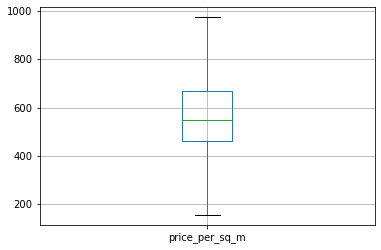

In [32]:
rent_df.boxplot(column="price_per_sq_m",showfliers = False)
# we can't use boxplots here because there are different median per subgroup

In [33]:
# Assign outliers if price per sq m is 5 times higher than the median value in the house
outliers = rent_df[(rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5]
print(len(outliers))
outliers.sample(10)

49


,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
793,5340729,2016-02-08T00:00:00+03:00,2016-02-15T00:00:00+03:00,2550000.0,8,False,1,False,38.0,6.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Варшавская улица, 51к1",6532707473577967135,67105.263158,555.555556
89576,7516885188513795329,2016-11-17T00:00:00+03:00,2016-12-05T00:00:00+03:00,225000.0,1,False,2,False,45.0,NaN,NaN,50.0,7.0,2,2,"Россия, Санкт-Петербург, проспект Кузнецова, 23к1",2929603598081674534,5000.000000,500.000000
59229,5217254,2016-01-27T00:00:00+03:00,2016-02-03T00:00:00+03:00,3500000.0,9,False,1,False,31.9,8.7,16.2,NaN,3.0,2,2,"Россия, Санкт-Петербург, Будапештская улица, 38к4",5729094119176815453,109717.868339,545.454545
34606,8059129620144091136,2016-12-02T00:00:00+03:00,2016-12-02T00:00:00+03:00,3400000.0,23,False,1,False,28.0,NaN,8.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Мебельная улица, 35к2",8602447095160085034,121428.571429,648.351648
115922,4281053917652545793,2016-09-02T00:00:00+03:00,2016-09-05T00:00:00+03:00,200000.0,2,False,1,False,35.0,9.0,18.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкин, Средняя улица, 13",536301776913345184,5714.285714,536.111111
122445,2149227771102617088,2016-10-24T00:00:00+03:00,2016-10-26T00:00:00+03:00,400000.0,8,False,1,False,56.0,28.0,19.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Большой проспект Васильевского острова, 58",9185529517877050892,7142.857143,775.862069
56406,4944609,2015-12-23T00:00:00+03:00,2016-05-10T00:00:00+03:00,2250000.0,4,False,1,False,35.0,9.0,17.0,100.0,3.0,2,2,"Россия, Ленинградская область, Тосно, проспект Ленина, 27",4242058865805744796,64285.714286,342.857143
2471,5565310413830597579,2018-06-19T00:00:00+03:00,2018-06-26T00:00:00+03:00,180000.0,2,False,0,True,27.0,NaN,NaN,100.0,NaN,2,2,"Россия, Санкт-Петербург, Кондратьевский проспект, 64к9",1081182048329084375,6666.666667,638.888889
92508,2999393105455825921,2018-06-20T00:00:00+03:00,2018-07-10T00:00:00+03:00,300000.0,14,False,2,False,69.9,11.0,41.0,35.0,7.0,2,2,"Россия, Санкт-Петербург, Тимуровская улица, 23к3",6543106262045781175,4291.845494,550.000000
126900,2877221490003907329,2018-01-10T00:00:00+03:00,2018-02-09T00:00:00+03:00,200000.0,5,False,1,False,40.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, улица Есенина, 14к2",7215469126417656128,5000.000000,606.060606


In [34]:
print(len(outliers))

49


In [35]:
outliers.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
122445,2149227771102617088,2016-10-24T00:00:00+03:00,2016-10-26T00:00:00+03:00,400000.0,8,False,1,False,56.0,28.0,19.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Большой проспект Васильевского острова, 58",9185529517877050892,7142.857143,775.862069
73297,5365373,2016-02-10T00:00:00+03:00,2016-02-17T00:00:00+03:00,180000.0,6,False,1,False,35.0,9.0,20.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, улица Крыленко, 19к1",4951256661585230565,5142.857143,562.500000
7848,7628260672396661331,2016-06-07T00:00:00+03:00,2016-06-07T00:00:00+03:00,300000.0,10,False,1,False,42.0,NaN,NaN,NaN,0.0,2,2,"Россия, Санкт-Петербург, улица Нахимова, 20",422510084331004574,7142.857143,625.000000
101548,8399018924321204224,2018-05-07T00:00:00+03:00,2018-05-28T00:00:00+03:00,320000.0,8,False,2,False,47.0,NaN,40.0,8.0,3.0,2,2,"Россия, Санкт-Петербург, улица Савушкина, 117к2",3173654661061858760,6808.510638,500.000000
140011,8260656212628561921,2017-03-14T00:00:00+03:00,2017-05-18T00:00:00+03:00,4300000.0,4,False,1,False,38.0,9.0,18.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пушкин, Оранжерейная улица, 39",1604138570197506217,113157.894737,595.238095
131397,8492010403417061889,2018-04-06T00:00:00+03:00,2018-04-24T00:00:00+03:00,3500000.0,8,False,0,True,30.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Репищева улица, 10к1",1967793054474181316,116666.666667,729.988466
59229,5217254,2016-01-27T00:00:00+03:00,2016-02-03T00:00:00+03:00,3500000.0,9,False,1,False,31.9,8.7,16.2,NaN,3.0,2,2,"Россия, Санкт-Петербург, Будапештская улица, 38к4",5729094119176815453,109717.868339,545.454545
61985,5877705379762139649,2016-09-20T00:00:00+03:00,2016-09-23T00:00:00+03:00,1500000.0,4,False,5,False,120.0,10.0,24.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Моховая улица, 39",9115222827675808854,12500.000000,750.000000
109762,5565310413830598600,2018-06-19T00:00:00+03:00,2018-06-26T00:00:00+03:00,180000.0,9,False,0,True,20.0,NaN,NaN,100.0,NaN,2,2,"Россия, Санкт-Петербург, Запорожская улица, 23к2",1317815542510856863,9000.000000,688.172043
117316,8256452766188685912,2018-05-11T00:00:00+03:00,2018-08-03T00:00:00+03:00,400000.0,3,False,2,False,85.0,30.0,40.0,50.0,1.0,2,2,"Россия, Санкт-Петербург, Итальянская улица, 11",15264832366839851,4705.882353,933.333333


#### Clean data from the outliers

In [36]:
# Let's create a new dataframe with clean data.
# With ~ we can select the data which does NOT correspond to the required conditions
rent_df_cleaned = rent_df[~((rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5)]

In [37]:
# check that in the middle segment everything is fine now
rent_df_cleaned[(rent_df_cleaned.last_price > 500000) & (rent_df_cleaned.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
95391,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508,3000.000000,1385.501355
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
154614,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,3636.363636,3636.363636
154615,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,5128.205128,3636.363636
154617,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,4285.714286,3636.363636


In [38]:
# look at offers with price > 1 000 000
rent_df_cleaned[(rent_df_cleaned.last_price >= 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
67005,5199154,2016-01-25T00:00:00+03:00,2016-01-26T00:00:00+03:00,3800000.0,3,False,2,False,51.0,6.0,30.5,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пискарёвский проспект, 149",7757194067653498771,74509.803922,74509.803922
95935,8743101202301731585,2016-10-13T00:00:00+03:00,2016-11-12T00:00:00+03:00,1500000.0,3,False,2,False,54.7,NaN,NaN,NaN,7.0,2,2,"Россия, Ленинградская область, Выборгский район, Светогорское городское поселение, поселок городского типа Лесогорский, улица Труда, 7",2755098623625145659,27422.303473,13811.700183
114024,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065,63636.363636,63636.363636
164662,4088017598264857345,2018-02-09T00:00:00+03:00,2018-03-21T00:00:00+03:00,1330000.0,3,False,1,False,33.0,6.0,19.0,NaN,3.0,2,2,"Россия, Ленинградская область, Луга, проспект Урицкого, 65",1792010144615909485,40303.030303,40303.030303


In [39]:
# we see, that all of them are outliers, they were not cleaned by the house price per sq m median 
# because it was the only one or just one of two offers per house
# let's clean them also
# Store result in the same dataframe
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]

In [40]:
# let's examine apartments with big price per sq m
rent_df_cleaned[rent_df_cleaned.price_per_sq_m > 3000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
549,8596035942924139265,2018-05-17T00:00:00+03:00,2018-07-04T00:00:00+03:00,450000.0,6,False,2,False,106.0,15.0,65.0,30.0,NaN,2,2,"Россия, Санкт-Петербург, Воскресенская набережная, 4",7262659557693263963,4245.283019,975.609756
28182,1492050389917501301,2017-06-07T00:00:00+03:00,2017-06-07T00:00:00+03:00,195000.0,4,False,1,False,57.0,8.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, проспект Добролюбова, 2",6684242979485775735,3421.052632,779.220779
39213,3793550987719225600,2017-03-19T00:00:00+03:00,2017-11-02T00:00:00+03:00,310000.0,3,False,4,False,100.0,14.0,71.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Лиговский проспект, 123",2861706125080798064,3100.000000,976.307190
44574,1896730477284436579,2017-05-31T00:00:00+03:00,2017-05-31T00:00:00+03:00,230000.0,9,False,2,False,67.0,14.0,30.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Глухая Зеленина улица, 6",6445545084936583797,3432.835821,923.076923
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
99409,7102677476104578816,2016-05-20T00:00:00+03:00,2016-05-20T00:00:00+03:00,270000.0,1,False,1,False,80.0,NaN,NaN,0.0,3.0,2,2,"Россия, Санкт-Петербург, Загородный проспект, 5",8810747501928407960,3375.000000,1978.197674
104668,159653575951184384,2016-06-16T00:00:00+03:00,2016-07-01T00:00:00+03:00,300000.0,2,False,3,False,54.0,8.0,35.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, 18-я линия В.О., 43",6003296125598219505,5555.555556,5555.555556
150701,1492050390917641037,2016-10-28T00:00:00+03:00,2017-06-07T00:00:00+03:00,400000.0,4,False,3,False,130.0,13.0,85.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Константиновский проспект, 23",5091810811209082905,3076.923077,3484.848485


In [41]:
# we can see that outliers are those which are in houses with price per sq m below 1000 rubles, 
# and those which are the same with median, in which case it's the only offer per house
outliers_count = len(rent_df_cleaned[(rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m))])
print("outliers found: {}".format(outliers_count))
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]

outliers found: 8


In [42]:
# now max price should be correct, lets look at this offer
max_rent_apartment = rent_df_cleaned[rent_df_cleaned.last_price == rent_df_cleaned.last_price.max()]
max_rent_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692


In [43]:
# let's look at house address. 
# with 'iloc' property we can take any row by index, 
# in this case we take the first item to get the address
max_rent_apartment.unified_address.iloc[0]

'Россия, Санкт-Петербург, Парадная улица, 3к1'

In [44]:
# impoort urllib to prepare correct URLs for looking at offers archive 
# at https://realty.yandex.ru/archive
import urllib

In [45]:
# if you're interested in images of this apartment you can find it here: 
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Парадная%20улица%2C%203к1/snyat/kvartira/2/?roomsTotal=4

# let's print the URL of the page, on which we can find our offer
# we use urllib.parse.quote function to get URL part from our address, otherwise URL wouldn't be correct
# print("https://realty.yandex.ru/archive/{}/snyat/kvartira/2/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# use filters there to select only apartments with 4 rooms

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%203%D0%BA1/snyat/kvartira/


### Find houses with the most cheapest and the most expensive rent price

In [46]:
# Create a new dataframe with houses and median price per sq m
# This time it should with the data calculated without outliers
house_rent_df_cleaned = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)

In [47]:
#here we extract the unified address and the highest median price per sqm
most_expensive_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.max()]
most_expensive_house

,unified_address,house_price_sqm_median_cleaned
16851,"Россия, Санкт-Петербург, проспект Динамо, 6",3705.357143


In [48]:
# you can look at the most expensive house here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(most_expensive_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%20%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%BE%2C%206/snyat/kvartira/


#### Find the most cheapest house for rent

In [49]:
most_cheapest_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.min()]
most_cheapest_house

,unified_address,house_price_sqm_median_cleaned
2421,"Россия, Ленинградская область, Кириши, улица Мира, 14",50.0


In [50]:
# we see that it's located in Leningrad Oblast, let's look only in St. Petersburg data
house_rent_df_cleaned_spb = house_rent_df_cleaned[house_rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]

,unified_address,house_price_sqm_median_cleaned
4852,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",76.923077


#### Clean cheap outliers
We see that we should clean the data, the cheapest house above is definitely a mistake, and it is an underground station building. You can check it at https://maps.yandex.ru

In [51]:
# consider only data inside the city without oblast
rent_df_cleaned_spb = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = rent_df_cleaned_spb.price_per_sq_m.median()
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))

Median price per sq m in St. Petersburg in rent: 555.5555555555555


In [52]:
# look at cheap apartments which are more than two times cheaper 
# than the median value of offers we calculated above (555)
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 250].sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
128244,6290752233233907713,2017-06-04T00:00:00+03:00,2017-06-04T00:00:00+03:00,12000.0,8,False,3,False,60.0,12.0,14.0,0.0,10.0,2,2,"Россия, Санкт-Петербург, улица Сикейроса, 21к1",7488548044274991848,200.000000,489.778890
31594,3849364,2015-09-05T00:00:00+03:00,2016-03-01T00:00:00+03:00,20000.0,3,False,4,False,107.0,11.0,70.0,100.0,2.0,2,2,"Россия, Санкт-Петербург, Сестрорецк, улица Александра Паншина, 20",5587301828019126141,186.915888,555.555556
123456,8861355573156622081,2018-05-16T00:00:00+03:00,2018-05-25T00:00:00+03:00,20000.0,4,False,2,False,85.0,16.0,42.0,30.0,NaN,2,2,"Россия, Санкт-Петербург, 15-я линия Васильевского острова, 70",3210205768735726046,235.294118,500.000000
165993,4842857799865269361,2018-03-12T00:00:00+03:00,2018-03-13T00:00:00+03:00,12000.0,11,False,4,False,93.0,20.0,12.0,NaN,NaN,2,2,"Россия, Санкт-Петербург, проспект Испытателей, 16",8987777608055758452,129.032258,129.032258
6921,5141797489724463666,2018-03-07T00:00:00+03:00,2018-05-08T00:00:00+03:00,30000.0,10,False,3,False,140.0,57.0,95.0,60.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Луначарского, 11к1",3271810337494402643,214.285714,574.919872
144002,234688644075427073,2018-02-17T00:00:00+03:00,2018-03-19T00:00:00+03:00,20000.0,4,False,3,False,82.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Галицкая улица, 5",480130382750169305,243.902439,246.951220
65820,3768164343717314560,2016-08-12T00:00:00+03:00,2016-09-13T00:00:00+03:00,18000.0,4,False,3,False,80.0,10.0,54.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Колпино, Московская улица, 6",7671924175431124156,225.000000,400.000000
6781,6300461494540652253,2018-07-10T00:00:00+03:00,2018-08-20T00:00:00+03:00,25000.0,10,False,2,False,106.0,14.0,42.0,50.0,6.0,2,2,"Россия, Санкт-Петербург, улица Ворошилова, 33к1",2769080952289993900,235.849057,487.804878
77954,6278491819191244528,2017-06-10T00:00:00+03:00,2017-06-15T00:00:00+03:00,20000.0,9,False,3,False,90.0,NaN,NaN,NaN,0.0,2,2,"Россия, Санкт-Петербург, Ленинский проспект, 51",2190208629105094048,222.222222,385.542169
84823,3375339907738528847,2017-02-22T00:00:00+03:00,2017-02-22T00:00:00+03:00,27000.0,8,False,2,False,109.0,22.0,41.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, проспект Авиаконструкторов, 32",262308617528631546,247.706422,450.000000


In [53]:
# it seems that we should clean all apartments where median price is at least 2x higher and cheap 
outliers = rent_df_cleaned_spb[(rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2)]

In [54]:
print("number of cheap outliers 2x cheaper: {}".format(len(outliers)))

number of cheap outliers 2x cheaper: 100


In [55]:
# clean outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2))]

In [56]:
# look at cheap apartments which were not cleaned with the previous heuristics
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 200]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
46867,4857633,2015-12-13T00:00:00+03:00,2016-06-05T00:00:00+03:00,12000.0,6,False,3,False,61.0,7.0,42.0,80.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Стрельнинское шоссе, 6к3",1523555400005784785,196.721311,256.578947
57861,4975278,2015-12-27T00:00:00+03:00,2016-01-12T00:00:00+03:00,13000.0,4,False,3,False,78.0,10.0,47.0,NaN,10.0,2,2,"Россия, Санкт-Петербург, 12-я Красноармейская улица, 7",6204918944542168630,166.666667,166.666667
80404,2939523434608526081,2018-03-06T00:00:00+03:00,2018-03-13T00:00:00+03:00,15000.0,6,False,3,False,87.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, Окраинная улица, 9В",4510539508387660402,172.413793,241.715116
85844,249021112485953840,2016-03-21T00:00:00+03:00,2016-07-05T00:00:00+03:00,12000.0,3,False,4,False,112.0,14.0,16.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Свеаборгская улица, 23",4943588578198944211,107.142857,107.142857
91302,8176284694677069056,2016-05-18T00:00:00+03:00,2016-05-18T00:00:00+03:00,14000.0,4,False,3,False,74.0,10.0,NaN,50.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 6к3",4976238169808254780,189.189189,291.963016
101249,5379909360861020417,2016-06-02T00:00:00+03:00,2016-06-09T00:00:00+03:00,14000.0,3,False,3,False,80.0,12.0,NaN,80.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 27",5194982532050895016,175.000000,233.333333
105186,801981697508642560,2016-06-20T00:00:00+03:00,2016-06-29T00:00:00+03:00,12000.0,6,False,5,False,156.0,23.0,16.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",7137635118733633172,76.923077,76.923077
105957,6302976505020612958,2016-06-25T00:00:00+03:00,2016-11-08T00:00:00+03:00,17000.0,4,False,3,False,100.0,16.0,20.0,50.0,0.0,2,2,"Россия, Санкт-Петербург, Центральный район, улица Некрасова, 38",4677861887331789522,170.000000,170.000000
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592
120839,2164881834443110913,2017-05-07T00:00:00+03:00,2017-05-14T00:00:00+03:00,15000.0,5,False,3,False,93.0,10.0,54.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 14-16",4153179922410625475,161.290323,264.912281


In [57]:
# there are cases where houses had just one offer and house median equals offer's price per square meter
# let's remove these outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 200) 
                                          & (rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.house_price_sqm_median))]

In [58]:
# look at the cheapest apartment
cheapest_offer = rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.price_per_sq_m.min()]
cheapest_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592


#### Recalculate houses price medians on the cleaned data and find the cheapest house

In [59]:
house_rent_df_cleaned_spb = rent_df_cleaned_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned_spb.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)
cheapest_house = house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_price_sqm_median_cleaned
5245,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",183.098592


In [60]:
# looking at the map we understand why it's so cheap: it's far away from the center of the city
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Красное%20Село%2C%20Нагорная%20улица%2C%2037/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(cheapest_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B5%20%D0%A1%D0%B5%D0%BB%D0%BE%2C%20%D0%9D%D0%B0%D0%B3%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2037/snyat/kvartira/


### Analyze how many offers have the commission 

In [61]:
# Some offers has commision fee for the agent (agent_fee)
# With 'value_counts' function find out the share of corresponding value
rent_df_cleaned_spb.agent_fee.value_counts(normalize=True, dropna=False)

100.000000    0.328129
50.000000     0.293380
NaN           0.209340
0.000000      0.035378
90.000000     0.034537
                ...   
11.000000     0.000006
12.000000     0.000006
64.997665     0.000006
12.000343     0.000006
99.990000     0.000006
Name: agent_fee, Length: 102, dtype: float64

We see that the most popular commission is 100% - 33% of offers. 21% of offers don't have any information about commission.

### Self-control stops
1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?
2. Calculate median and mean prices for apartments for sell before cleaning the data in St.Petersburg without Leningrad Oblast.
3. Find houses (not apartments!) with the most cheapest and most expensive sell price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.
3. Find the most expensive and the most cheapest apartment for sale in St. Petersburg after cleaning outliers.
4. Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in St.Petersburg in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

In [62]:
##Q1
#Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. 
#Which of the statistics changed more and why?
#rent_df_cleaned is the one without leningrad oblast
rent_df_spb = rent_df[rent_df.unified_address.str.contains("Россия, Санкт-Петербург")]
median_rent_df_spb = rent_df_spb.last_price.median()
print("Median price for rent in Spb before cleaning: {}".format(median_rent_df_spb))
median_rent_df_cleaned_spb = rent_df_cleaned_spb.last_price.median()
print("Median price for rent in Spb after cleaning: {}".format(median_rent_df_cleaned_spb))
mean_rent_df_spb = rent_df_spb.last_price.mean()
print("Mean price for rent in Spb before cleaning: {}".format(mean_rent_df_spb))
mean_rent_df_cleaned_spb = rent_df_cleaned_spb.last_price.mean()
print("Mean price for rent in Spb after cleaning: {}".format(mean_rent_df_cleaned_spb))
print("Variance in median: {}".format(median_rent_df_spb-median_rent_df_cleaned_spb))
print("Variance in mean: {}".format(mean_rent_df_spb-mean_rent_df_cleaned_spb))

Median price for rent in Spb before cleaning: 25000.0
Median price for rent in Spb after cleaning: 25000.0
Mean price for rent in Spb before cleaning: 33015.23299627052
Mean price for rent in Spb after cleaning: 32605.087189685033
Variance in median: 0.0
Variance in mean: 410.14580658548584


The mean changed the most out of the two measures - it's also higher than the median, the distribution of prices is  skewed in the positive direction. The mean decreased more than the median means that the observations we deleted contained extreme values; as usual, extreme values influence the mean more than the median, the amount of rows deleted influenced the median less, especially if values in the centre of the distribution were not deleted. The central portion of our distribution hasn't changed.

In [108]:
##Q2
##Calculate median and mean prices for apartments for sell before cleaning the data in St.Petersburg without Leningrad Oblast.
sell_median_price = sell_df[sell_df.unified_address.str.contains("Россия, Санкт-Петербург")].last_price.median()
sell_mean_price = sell_df[sell_df.unified_address.str.contains("Россия, Санкт-Петербург")].last_price.mean()
print("Sell median price: {}".format(sell_median_price))
print("Sell mean price: {}".format(sell_mean_price))
max_price_sell = sell_df.last_price.max()
print("Max sell price: {}".format(max_price_sell))

Sell median price: 5300000.0
Sell mean price: 8151204.698728967
Max sell price: 763000000.0


In [64]:
sell_df

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
0,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.40,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068
1,5490504238903444021,2014-11-27T00:00:00+03:00,2016-04-28T00:00:00+03:00,7038880.0,2,False,3,False,85.84,19.64,41.20,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906
2,5490504238903447743,2014-11-27T00:00:00+03:00,2016-05-11T00:00:00+03:00,7038880.0,3,False,3,False,85.84,19.64,41.20,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906
3,5490504238877673946,2014-11-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,12074400.0,5,False,3,False,93.60,10.90,52.00,NaN,0.0,1,2,"Россия, Санкт-Петербург, Свердловская набережная, 58А",5917543958366039686
4,5490504238877648740,2014-11-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,20406100.0,7,False,4,False,142.70,13.84,82.55,NaN,0.0,1,2,"Россия, Санкт-Петербург, Свердловская набережная, 58А",5917543958366039686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428150,8878246722621347329,2015-04-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,9518400.0,5,False,2,False,79.30,12.70,41.70,NaN,NaN,1,2,"Россия, Санкт-Петербург, Пушкин, Оранжерейная улица, 51А",5611936545005959407
428152,3427091043658685467,2018-04-19T00:00:00+03:00,2018-08-20T00:00:00+03:00,9700000.0,3,False,3,False,96.00,24.00,52.70,0.0,NaN,1,2,"Россия, Санкт-Петербург, Большой Сампсониевский проспект, 49",3378183817201681233
428153,9174606537145009081,2018-08-17T00:00:00+03:00,2018-08-20T00:00:00+03:00,9700000.0,5,False,2,False,80.00,23.00,31.00,NaN,NaN,1,2,"Россия, Санкт-Петербург, Большой проспект Васильевского острова, 74",9185529517877050950
428154,4656491348410494465,2018-06-29T00:00:00+03:00,2018-08-20T00:00:00+03:00,9703000.0,4,False,2,False,78.78,16.80,40.62,NaN,2.0,1,2,"Россия, Санкт-Петербург, улица Жукова, 1",580805813953628536


In [65]:
##Q3
#Find houses (not apartments!) with the most cheapest and most expensive sell price per sq m in St. Petersburg 
#without Leningrad Oblast after cleaning outliers.
sell_df.last_price.describe()
#standard deviation is way too high and different from the mean; the mean is way higher than the median
#probably too many extreme values on the right part of the distribution

count    2.580010e+05
mean     6.969288e+06
std      1.148102e+07
min      1.900000e+04
25%      3.296216e+06
50%      4.599000e+06
75%      7.000000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [66]:
sell_df_max = sell_df[sell_df.last_price == max_price_sell]
sell_df_max

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
224434,619165944711730944,2017-09-30T00:00:00+03:00,2017-11-02T00:00:00+03:00,763000000.0,10,False,7,False,400.0,NaN,250.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, Мичуринская улица, 4",7962972499404580673


In [67]:
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/kupit/kvartira/".format(urllib.parse.quote(sell_df_max.unified_address.iloc[0])))
#720 mil rub in Gorkvovskaya neighbourhood, sounds wrong (probably)?

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9C%D0%B8%D1%87%D1%83%D1%80%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%204/kupit/kvartira/


Number of outliers in sell: 23


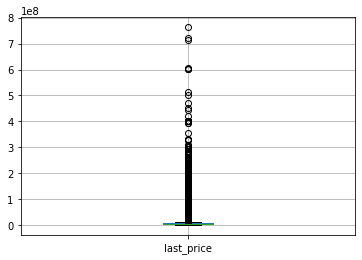

In [68]:
sell_df.boxplot("last_price")
outliers_sell = sell_df[sell_df.last_price > 360000000]
print("Number of outliers in sell: {}".format(len(outliers_sell)))

In [69]:
outliers_sell
#Hard to tell without expertise, but my best guess is that Большая Пушкарская and Мичуринская at ~715-720mil are probably wrong
#we check this middle segment to see if there are some potential mistake, and it is the case here

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
1036,5028522700590625318,2015-01-21T00:00:00+03:00,2017-01-09T00:00:00+03:00,715000000.0,1,False,9,False,550.0,NaN,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, Большая Пушкарская улица, 1",2009094821262044658
4062,5028522700596204200,2015-04-16T00:00:00+03:00,2017-01-09T00:00:00+03:00,470000000.0,1,False,5,False,700.0,130.0,675.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Английская набережная, 22",3056341244765973000
12935,5490504238964636572,2015-09-18T00:00:00+03:00,2016-08-01T00:00:00+03:00,401300320.0,9,False,5,False,825.5,41.0,185.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740
15358,5028522704318229029,2015-09-28T00:00:00+03:00,2017-01-09T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740
26451,5028522700620392289,2015-12-10T00:00:00+03:00,2016-02-22T00:00:00+03:00,602400000.0,9,False,8,False,602.4,23.5,309.6,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324
26561,5028522700620392291,2015-12-10T00:00:00+03:00,2017-01-09T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324
48666,5028522700620450104,2016-03-21T00:00:00+03:00,2016-07-05T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 75",3406104650917898325
48761,5028522700620450081,2016-03-21T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,224.1,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324
62961,5028522704340151610,2016-05-16T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,308.6,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740
71388,465842340730588673,2016-02-20T00:00:00+03:00,2017-03-19T00:00:00+03:00,401300000.0,9,False,5,False,401.0,24.0,204.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740


In [70]:
#Same as with rent, maybe there are several flats for sale in the same building?
#Calculate price per sqm
sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area
sell_df.head(5)

<ipython-input-70-fad95f77c954>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area


,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m
0,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.40,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,134187.591241
1,5490504238903444021,2014-11-27T00:00:00+03:00,2016-04-28T00:00:00+03:00,7038880.0,2,False,3,False,85.84,19.64,41.20,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906,82000.000000
2,5490504238903447743,2014-11-27T00:00:00+03:00,2016-05-11T00:00:00+03:00,7038880.0,3,False,3,False,85.84,19.64,41.20,NaN,0.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к4",7274736308217971906,82000.000000
3,5490504238877673946,2014-11-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,12074400.0,5,False,3,False,93.60,10.90,52.00,NaN,0.0,1,2,"Россия, Санкт-Петербург, Свердловская набережная, 58А",5917543958366039686,129000.000000
4,5490504238877648740,2014-11-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,20406100.0,7,False,4,False,142.70,13.84,82.55,NaN,0.0,1,2,"Россия, Санкт-Петербург, Свердловская набережная, 58А",5917543958366039686,143000.000000


In [71]:
sell_median_price_per_sq_m = sell_df.price_per_sq_m.median()
sell_mean_price_per_sq_m = sell_df.price_per_sq_m.mean()
print("Median price per sq m in sell: {}".format(sell_median_price_per_sq_m))
print("Mean price per sq m in sell: {}".format(sell_mean_price_per_sq_m))

Median price per sq m in sell: 95214.28571428571
Mean price per sq m in sell: 102713.8800799551


In [72]:
#see if we have many listings on the same unified address (in a "house")
house_sell_df = sell_df.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df.head(5)

,unified_address,price_per_sq_m
0,"Россия, Ленинградская область, Бокситогорск, Городская улица, 1",15316.249610
1,"Россия, Ленинградская область, Бокситогорск, Городская улица, 3",19080.327869
2,"Россия, Ленинградская область, Бокситогорск, Городская улица, 4",20812.534664
3,"Россия, Ленинградская область, Бокситогорск, Дымское шоссе, 1",14600.000000
4,"Россия, Ленинградская область, Бокситогорск, Заводская улица, 11",14642.978290


In [73]:
house_sell_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)
sell_df = sell_df.merge(house_sell_df)
sell_df.head(3)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
0,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.4,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,134187.591241,124074.074074
1,5490504238876903008,2014-11-27T00:00:00+03:00,2016-05-24T00:00:00+03:00,3285640.0,18,False,1,False,27.4,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,119913.868613,124074.074074
2,5490504238876906068,2014-11-27T00:00:00+03:00,2016-07-15T00:00:00+03:00,4669280.0,8,False,1,False,47.8,12.21,16.40,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,97683.682008,124074.074074


In [74]:
#are there listings with a wide gap between the median price per sq m and the price per sq m?
sell_median_outliers = sell_df[(sell_df.price_per_sq_m/sell_df.house_price_sqm_median) > 5]
print(len(sell_median_outliers))

52


In [75]:
sell_median_outliers.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
113943,8224981222500505089,2016-12-22T00:00:00+03:00,2017-02-05T00:00:00+03:00,213529328.0,14,False,1,False,33.0,8.3,17.0,NaN,2.0,1,2,"Россия, Санкт-Петербург, улица Доблести, 7к1",6348247116570436830,6.470586e+06,109572.271386
147359,5902825275847175680,2016-03-24T00:00:00+03:00,2016-06-22T00:00:00+03:00,34000000.0,10,False,1,False,40.4,NaN,14.0,NaN,11.0,1,2,"Россия, Санкт-Петербург, переулок Гривцова, 6",6312852829589816564,8.415842e+05,99509.803922
157755,5251904,2016-01-29T00:00:00+03:00,2018-08-20T00:00:00+03:00,85000000.0,7,False,4,False,185.0,NaN,123.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, Невский проспект, 137",2892335032057220989,4.594595e+05,71418.506787
153163,7848053552293849344,2018-07-14T00:00:00+03:00,2018-08-20T00:00:00+03:00,48999000.0,1,False,1,False,47.0,23.0,8.0,NaN,3.0,1,2,"Россия, Санкт-Петербург, Лахтинская улица, 18",7321902868942364572,1.042532e+06,122312.500000
185078,619165944711730944,2017-09-30T00:00:00+03:00,2017-11-02T00:00:00+03:00,763000000.0,10,False,7,False,400.0,NaN,250.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, Мичуринская улица, 4",7962972499404580673,1.907500e+06,283453.422542
219633,6633140150908361473,2018-02-20T00:00:00+03:00,2018-04-19T00:00:00+03:00,68000000.0,5,False,3,False,83.0,9.0,60.0,NaN,NaN,1,2,"Россия, Санкт-Петербург, Средний проспект Васильевского острова, 49",5553660887271054669,8.192771e+05,128160.919540
206499,2245016279586032849,2016-10-13T00:00:00+03:00,2016-11-02T00:00:00+03:00,12345678.0,4,False,1,False,37.0,NaN,18.0,NaN,6.0,1,2,"Россия, Ленинградская область, Кировский район, Отрадное, Никольское шоссе, 23",8538548567409150601,3.336670e+05,55469.035753
125807,8457217352584272433,2016-05-24T00:00:00+03:00,2017-02-27T00:00:00+03:00,151000000.0,1,False,5,False,120.0,NaN,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Профессора Попова, 2",6439896804325032024,1.258333e+06,141780.388908
16102,7628260672396694971,2016-11-02T00:00:00+03:00,2017-05-26T00:00:00+03:00,56500000.0,2,False,1,False,48.0,NaN,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, Афанасьевская улица, 1",4089579412762168500,1.177083e+06,120000.000000
122242,693837914213651457,2017-03-31T00:00:00+03:00,2017-06-03T00:00:00+03:00,45000000.0,5,False,2,False,47.2,8.0,31.0,NaN,3.0,1,2,"Россия, Санкт-Петербург, Белградская улица, 24",1872763988793782544,9.533898e+05,100000.000000


In [76]:
#Some listings have a wide gap and unrealistic prices.. the one on Dumskaya at 86mil is a real bargain
sell_df_cleaned = sell_df[~((sell_df.price_per_sq_m/sell_df.house_price_sqm_median) > 5)]
sell_df_cleaned[(sell_df_cleaned.last_price > 360000000) & (sell_df_cleaned.last_price < 720000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
17596,4479241398939301120,2017-11-20T00:00:00+03:00,2018-08-20T00:00:00+03:00,450000000.0,2,False,6,False,470.0,NaN,NaN,NaN,NaN,1,2,"Россия, Санкт-Петербург, Морской проспект, 33",7313362257532056812,9.574468e+05,345833.333333
32771,2554639205142175302,2017-12-06T00:00:00+03:00,2018-03-22T00:00:00+03:00,420000000.0,25,False,12,False,900.0,112.0,409.7,NaN,NaN,1,2,"Россия, Санкт-Петербург, улица Кораблестроителей, 32к1",7323709713868739342,4.666667e+05,142857.142857
33586,8310251191854456764,2016-10-12T00:00:00+03:00,2018-07-24T00:00:00+03:00,400000000.0,13,False,5,False,903.0,100.0,500.0,0.0,2.0,1,2,"Россия, Санкт-Петербург, Воскресенская набережная, 4",7262659557693263963,4.429679e+05,300205.968050
57385,5028522700596204200,2015-04-16T00:00:00+03:00,2017-01-09T00:00:00+03:00,470000000.0,1,False,5,False,700.0,130.0,675.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Английская набережная, 22",3056341244765973000,6.714286e+05,182692.307692
69929,5028522700620392289,2015-12-10T00:00:00+03:00,2016-02-22T00:00:00+03:00,602400000.0,9,False,8,False,602.4,23.5,309.6,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.000000e+06,500000.000000
69932,5028522700620392291,2015-12-10T00:00:00+03:00,2017-01-09T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.138440e+06,500000.000000
69948,5028522700620450081,2016-03-21T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,224.1,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76",3406104650917898324,1.145683e+06,500000.000000
81032,5490504238964636572,2015-09-18T00:00:00+03:00,2016-08-01T00:00:00+03:00,401300320.0,9,False,5,False,825.5,41.0,185.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,4.861300e+05,500000.000000
81042,5028522704318229029,2015-09-28T00:00:00+03:00,2017-01-09T00:00:00+03:00,401300000.0,9,False,6,False,352.5,18.0,175.0,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,1.138440e+06,500000.000000
81052,5028522704340151610,2016-05-16T00:00:00+03:00,2017-01-09T00:00:00+03:00,602400000.0,9,False,8,False,525.8,23.5,308.6,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,1.145683e+06,500000.000000


In [77]:
#let's check if our ratio cleaned everything - no
sell_df_cleaned[(sell_df_cleaned.last_price >= 720000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median


In [78]:
#clean extreme outlier
sell_df_cleaned = sell_df_cleaned[sell_df_cleaned.last_price < 720000000]

In [79]:
# Previous approach: take approximately 5 times the median per sq m (94339)
sell_df_cleaned_variance=sell_df_cleaned[sell_df_cleaned.price_per_sq_m > 472000]
print(len(sell_df_cleaned_variance))
#335 rows, let's see the variance
sell_df_cleaned_variance["variance"]=sell_df_cleaned["price_per_sq_m"]-sell_df_cleaned["house_price_sqm_median"]
sell_df_cleaned_variance.head()

668


<ipython-input-79-7e2a17fc5e9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_df_cleaned_variance["variance"]=sell_df_cleaned["price_per_sq_m"]-sell_df_cleaned["house_price_sqm_median"]


,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median,variance
1298,5028522700589824838,2014-11-27T00:00:00+03:00,2016-06-04T00:00:00+03:00,129641000.0,5,False,2,False,242.9,14.2,200.8,NaN,0.0,1,2,"Россия, Санкт-Петербург, Аптекарский переулок, 4",3756270137055046483,533721.696171,215251.156642,318470.539529
4264,5028522699968447192,2014-12-09T00:00:00+03:00,2016-09-01T00:00:00+03:00,104750000.0,7,False,4,False,209.5,19.2,117.8,NaN,0.0,1,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,500000.000000,409846.153846,90153.846154
4274,6260945504884201511,2014-11-27T00:00:00+03:00,2016-07-25T00:00:00+03:00,90944000.0,8,False,4,False,186.0,17.0,97.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,488946.236559,409846.153846,79100.082713
4276,5028522700621107275,2016-05-26T00:00:00+03:00,2016-08-30T00:00:00+03:00,105000000.0,3,False,3,False,150.0,NaN,96.5,NaN,0.0,1,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,700000.000000,409846.153846,290153.846154
4277,8812215976312006144,2016-06-24T00:00:00+03:00,2016-10-30T00:00:00+03:00,105000000.0,1,False,3,False,150.0,20.0,97.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,700000.000000,409846.153846,290153.846154


In [80]:
# previous approach: houses with more than 5 time the median in price per sq m, and less than 2 times the median price  per sq m
# and those with only one offer per house
# I understand that when the "variance" between median and actual price is wide, it's a mistake? 
outliers_count = len(sell_df_cleaned[(sell_df_cleaned.price_per_sq_m > 472000) 
                                     & ((sell_df_cleaned.house_price_sqm_median < 190000) 
                                        | (sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.price_per_sq_m))])
print("outliers found: {}".format(outliers_count))
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m > 472000) 
                                    & ((sell_df_cleaned.house_price_sqm_median < 190000) 
                                        | (sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.price_per_sq_m)))]

outliers found: 80


In [81]:
sell_df_median_price_sqm_cleaned = sell_df_cleaned.price_per_sq_m.median()
sell_df_mean_price_sqm_cleaned = sell_df_cleaned.price_per_sq_m.mean()
print("Median price per sq m in sell: {}".format(sell_df_median_price_sqm_cleaned))
print("Mean price per sq m in sell: {}".format(sell_df_mean_price_sqm_cleaned))

print("Variance in median: {}".format(sell_median_price_per_sq_m-sell_df_median_price_sqm_cleaned))
print("Variance in mean: {}".format(sell_mean_price_per_sq_m-sell_df_mean_price_sqm_cleaned))

Median price per sq m in sell: 95192.30769230769
Mean price per sq m in sell: 102284.2750268072
Variance in median: 21.978021978022298
Variance in mean: 429.6050531478977


In [82]:
#much better
sell_df_cleaned.price_per_sq_m.describe()

count    2.578690e+05
mean     1.022843e+05
std      5.159507e+04
min      4.871795e+02
25%      7.739308e+04
50%      9.519231e+04
75%      1.152162e+05
max      1.736842e+06
Name: price_per_sq_m, dtype: float64

In [83]:
max_sale_apartment = sell_df_cleaned[sell_df_cleaned.last_price == sell_df_cleaned.last_price.max()]
max_sale_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
237351,8310251211233707984,2018-03-26T00:00:00+03:00,2018-08-20T00:00:00+03:00,605740032.0,2,False,5,False,443.0,10.0,248.0,0.0,NaN,1,2,"Россия, Санкт-Петербург, Южная дорога, 5",3312559599398519904,1.367359e+06,759301.442673


In [84]:
import urllib
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/kupit/kvartira/".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%203%D0%BA1/kupit/kvartira/


In [85]:
#Cheapest building (house) sell price per sq m in St. Petersburg without Leningrad oblast post cleaning
sell_df_cleaned_spb = sell_df_cleaned[sell_df_cleaned.unified_address.str.contains("Россия, Санкт-Петербург,")]
sell_df_cleaned_spb[sell_df_cleaned_spb.house_price_sqm_median==sell_df_cleaned_spb.house_price_sqm_median.min()]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
249433,2922093125162048769,2018-02-09T00:00:00+03:00,2018-02-20T00:00:00+03:00,1250000.0,3,False,7,False,250.0,13.0,18.0,NaN,3.0,1,2,"Россия, Санкт-Петербург, Конторская улица, 16",6072468226709963670,5000.0,5000.0


In [86]:
#most expensive building (house) without Leningrad oblast post cleaning
sell_df_cleaned_spb[sell_df_cleaned_spb.house_price_sqm_median==sell_df_cleaned_spb.house_price_sqm_median.max()]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
223172,1285755217853609883,2017-03-04T00:00:00+03:00,2017-04-02T00:00:00+03:00,115000000.0,1,False,3,False,151.7,30.0,60.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Санаторная аллея, 3",4057330062838252075,758075.148319,837837.837838
223173,1285755217853609886,2017-03-04T00:00:00+03:00,2017-04-02T00:00:00+03:00,120000000.0,2,False,4,False,153.4,25.0,110.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Санаторная аллея, 3",4057330062838252075,782268.578879,837837.837838
223175,1285755217853609861,2017-03-04T00:00:00+03:00,2017-04-02T00:00:00+03:00,137000000.0,1,False,3,False,201.2,50.0,99.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Санаторная аллея, 3",4057330062838252075,680914.512922,837837.837838
223176,1285755217853609887,2017-03-04T00:00:00+03:00,2017-04-02T00:00:00+03:00,218500000.0,2,False,5,False,244.9,20.0,110.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Санаторная аллея, 3",4057330062838252075,892200.898326,837837.837838
223177,1285755217853609885,2017-03-04T00:00:00+03:00,2017-04-02T00:00:00+03:00,220000000.0,2,False,4,False,257.6,25.0,110.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Санаторная аллея, 3",4057330062838252075,854037.267081,837837.837838
223178,1285755217853609888,2017-03-04T00:00:00+03:00,2017-04-02T00:00:00+03:00,220000000.0,3,False,4,False,225.3,23.0,110.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Санаторная аллея, 3",4057330062838252075,976475.810031,837837.837838


In [87]:
#Q4
#Find the most expensive and the most cheapest apartment for sale in St. Petersburg after cleaning outliers
#most expensive flat without Leningrad oblast post cleaning
sell_df_cleaned_spb[sell_df_cleaned_spb.price_per_sq_m==sell_df_cleaned_spb.price_per_sq_m.max()]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
7438,8310251211319744238,2018-04-04T00:00:00+03:00,2018-08-20T00:00:00+03:00,330000000.0,5,False,3,False,190.0,40.0,95.0,0.0,1.0,1,2,"Россия, Санкт-Петербург, Большая Конюшенная улица, 10",2673376664769372453,1.736842e+06,369954.557605
7439,8310251211319744363,2018-04-04T00:00:00+03:00,2018-08-20T00:00:00+03:00,330000000.0,6,False,3,False,190.0,25.0,90.0,0.0,1.0,1,2,"Россия, Санкт-Петербург, Большая Конюшенная улица, 10",2673376664769372453,1.736842e+06,369954.557605


In [88]:
#cheapest flat without Leningrad Oblast post cleaning
sell_df_cleaned_spb[sell_df_cleaned_spb.price_per_sq_m==sell_df_cleaned_spb.price_per_sq_m.min()]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
137355,3438368921946229505,2016-06-16T00:00:00+03:00,2016-06-19T00:00:00+03:00,19000.0,4,False,1,True,39.0,NaN,18.0,NaN,11.0,1,2,"Россия, Санкт-Петербург, улица Ленсовета, 69к1",8047169421659571687,487.179487,134864.66785


In [89]:
##Q5
#Calculate how many years does it take to cover all money spent on buying apartment by renting it. 
#Find houses in St.Petersburg in which it's the most effective to invest in buying if you plan to rent 
#and houses in which it will be the most ineffective.

In [90]:
#Strategy : two subgroups, one with all rows but containing house_price_rent, the other with only rows containing a value in house_price_sell
#Then merge based on unified address, calculate breakeven years, and drop NaN in breakeven years, which means there is only one value (rent or sell)
# we  keep those we can compare because we have data for rent and sell at the same address

#renaming for the sake of clarity
sell_df_cleaned = sell_df_cleaned_spb
rent_df_cleaned = rent_df_cleaned_spb

#recalculating medians to make sure we take the right data
print("length cleaned sell in SPb: ",len(sell_df_cleaned), len(sell_df_cleaned.columns))
print("length cleaned rent in SPb: ",len(rent_df_cleaned), len(rent_df_cleaned.columns))
group_df_sell_median = sell_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
group_df_sell_median.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)
group_df_rent_median = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
group_df_rent_median.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

sell_df_cleaned = sell_df_cleaned.merge(group_df_sell_median)
rent_df_cleaned = rent_df_cleaned.merge(group_df_rent_median)
print("length cleaned sell in SPb: ",len(sell_df_cleaned), len(sell_df_cleaned.columns))
print("length cleaned rent in SPb: ",len(rent_df_cleaned), len(rent_df_cleaned.columns))

length cleaned sell in SPb:  197673 19
length cleaned rent in SPb:  155890 19
length cleaned sell in SPb:  195074 19
length cleaned rent in SPb:  153439 19


In [93]:
#Separate rent type median and sell type median!
sell_df_cleaned.rename(columns = {'house_price_sqm_median': 'house_price_sqm_median_sell'}, inplace = True)
rent_df_cleaned.rename(columns = {'house_price_sqm_median': 'house_price_sqm_median_rent'}, inplace = True)
frames = [sell_df_cleaned,rent_df_cleaned]
result = pd.concat(frames)
print("length concatenated: ",len(result))

merging_rent=result.loc[(result['offer_type'] == 2), ["unified_address",'house_price_sqm_median_rent']]
print("sell only length",len(merging_rent))
                                                 
result_merged = result.merge(merging_rent, how="inner", on="unified_address")
print("after merging", len(result_merged))

length concatenated:  348513
sell only length 153439
after merging 11531127


In [96]:
result_merged.drop(columns="house_price_sqm_median_rent_x")

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median_sell,house_price_sqm_median_rent_y
0,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.4,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,134187.591241,124074.074074,710.818713
1,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.4,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,134187.591241,124074.074074,710.818713
2,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.4,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,134187.591241,124074.074074,710.818713
3,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.4,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,134187.591241,124074.074074,710.818713
4,5490504238877583424,2014-11-27T00:00:00+03:00,2016-03-14T00:00:00+03:00,3676740.0,19,False,1,False,27.4,16.56,16.56,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Шкапина, 9-11",3552413344225333068,134187.591241,124074.074074,710.818713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531122,5027673376073916928,2018-08-19T00:00:00+03:00,2018-08-20T00:00:00+03:00,16000.0,1,False,1,False,32.0,8.00,12.00,0.0,3.0,2,2,"Россия, Санкт-Петербург, Конторская улица, 17",6072468226709963671,500.000000,NaN,500.000000
11531123,236598655732428183,2018-08-19T00:00:00+03:00,2018-08-20T00:00:00+03:00,20000.0,3,False,2,False,45.0,8.00,35.00,90.0,NaN,2,2,"Россия, Санкт-Петербург, Курортный район, посёлок Белоостров, Александровское шоссе, 17",3457706555048662321,444.444444,NaN,444.444444
11531124,236598655732428183,2018-08-19T00:00:00+03:00,2018-08-20T00:00:00+03:00,20000.0,3,False,2,False,45.0,8.00,35.00,90.0,NaN,2,2,"Россия, Санкт-Петербург, Курортный район, посёлок Белоостров, Александровское шоссе, 17",3457706555048662321,444.444444,NaN,444.444444
11531125,3620276685323579905,2018-08-19T00:00:00+03:00,2018-08-20T00:00:00+03:00,20000.0,3,False,1,False,45.0,17.00,18.00,50.0,NaN,2,2,"Россия, Санкт-Петербург, Курортный район, посёлок Белоостров, Александровское шоссе, 17",3457706555048662321,444.444444,NaN,444.444444


In [98]:
result_merged["breakeven_years"]=(result_merged.house_price_sqm_median_sell / result_merged.house_price_sqm_median_rent_y) / 12

In [100]:
final = result_merged[~result_merged['breakeven_years'].isnull()]

In [106]:
print("final length?",len(final))
#much more rows than in the beginning.. There is an issue with .merge on strings?

final length? 5413692


In [101]:
final_ineffective = final.sort_values(by = "breakeven_years", ascending = False)
final_ineffective.head(3)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median_sell,house_price_sqm_median_rent_x,house_price_sqm_median_rent_y,breakeven_years
10281251,1443304022455782144,2016-06-16T00:00:00+03:00,2016-08-03T00:00:00+03:00,7900000.0,4,False,3,False,72.0,9.0,51.0,NaN,11.0,1,2,"Россия, Санкт-Петербург, Бронницкая улица, 27",5973191840232289745,1.097222e+05,764861.111111,NaN,628.685259,101.383681
10281257,4108699179660617729,2018-04-25T00:00:00+03:00,2018-07-24T00:00:00+03:00,21300000.0,2,False,0,True,15.0,NaN,12.0,NaN,11.0,1,2,"Россия, Санкт-Петербург, Бронницкая улица, 27",5973191840232289745,1.420000e+06,764861.111111,NaN,628.685259,101.383681
10281250,1443304022455782144,2016-06-16T00:00:00+03:00,2016-08-03T00:00:00+03:00,7900000.0,4,False,3,False,72.0,9.0,51.0,NaN,11.0,1,2,"Россия, Санкт-Петербург, Бронницкая улица, 27",5973191840232289745,1.097222e+05,764861.111111,NaN,628.685259,101.383681


In [102]:
final_effective = final.sort_values(by = "breakeven_years", ascending = True)
final_effective.head(3)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median_sell,house_price_sqm_median_rent_x,house_price_sqm_median_rent_y,breakeven_years
10493839,6689395108089547009,2016-09-09T00:00:00+03:00,2016-09-12T00:00:00+03:00,1399000.0,6,False,4,False,105.0,NaN,15.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Лесной проспект, 61А",5119652757321781568,13323.809524,13323.809524,NaN,537.037037,2.067488
10493840,6689395108089547009,2016-09-09T00:00:00+03:00,2016-09-12T00:00:00+03:00,1399000.0,6,False,4,False,105.0,NaN,15.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Лесной проспект, 61А",5119652757321781568,13323.809524,13323.809524,NaN,537.037037,2.067488
10493841,6689395108089547009,2016-09-09T00:00:00+03:00,2016-09-12T00:00:00+03:00,1399000.0,6,False,4,False,105.0,NaN,15.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Лесной проспект, 61А",5119652757321781568,13323.809524,13323.809524,NaN,537.037037,2.067488


The house located on Бронницкая улица, 27, if bought, for the current rent price, will take 101 years to cover the money for buying it.
The house located on Лесной проспект, 61А, if bought, for the current rent price, will take 2 years to cover the money for buying it.